In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import os
for dirname, _, filenames in os.walk('../data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/data_description.txt
../data/sample_submit.csv
../data/test.csv
../data/train.csv
../data/.ipynb_checkpoints\sample_submit-checkpoint.csv
../data/.ipynb_checkpoints\test-checkpoint.csv
../data/.ipynb_checkpoints\train-checkpoint.csv


In [2]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
sample_sub = pd.read_csv('../data/sample_submit.csv')

combined_df = pd.concat((train_df, test_df))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# train_dfの特徴量（＝列名）を出力
print(train_df.columns.values)

train_df.head(5)
test_df.head(5)

['index' 'Order' 'MS SubClass' 'MS Zoning' 'Lot Area' 'Lot Shape'
 'Land Contour' 'Lot Config' 'Neighborhood' 'Bldg Type' 'House Style'
 'Overall Qual' 'Overall Cond' 'Year Built' 'Year Remod/Add' 'Roof Style'
 'Exterior 1st' 'Exterior 2nd' 'Exter Qual' 'Foundation' 'BsmtFin SF 1'
 'Bsmt Unf SF' 'Total Bsmt SF' 'Heating QC' 'Central Air' 'Electrical'
 '1st Flr SF' '2nd Flr SF' 'Gr Liv Area' 'Bsmt Full Bath' 'Full Bath'
 'Half Bath' 'Bedroom AbvGr' 'Kitchen AbvGr' 'Kitchen Qual'
 'TotRms AbvGrd' 'Fireplaces' 'Garage Cars' 'Garage Area' 'Paved Drive'
 'Wood Deck SF' 'Open Porch SF' 'Mo Sold' 'Yr Sold' 'Sale Type'
 'Sale Condition' 'SalePrice']


,index,Order,MS SubClass,MS Zoning,Lot Area,Lot Shape,Land Contour,Lot Config,Neighborhood,Bldg Type,...,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,398,414,60,RL,6120,IR1,Lvl,Inside,CollgCr,1Fam,...,1,2.998003,372.666174,Y,0,0,6,2006,WD,Normal
1,3833,2163,20,RL,9600,Reg,Lvl,Inside,Sawyer,1Fam,...,0,1.998014,637.974154,Y,0,0,3,2006,WD,Normal
2,4836,754,20,RL,9600,IR1,Lvl,Inside,NridgHt,1Fam,...,1,2.998008,605.913790,Y,0,0,5,2007,WD,Normal
3,4572,2284,80,RL,9600,IR1,Lvl,Inside,NAmes,1Fam,...,1,0.998020,200.755592,Y,0,0,7,2006,WD,Normal
4,636,2163,20,RL,7200,Reg,Lvl,Inside,NAmes,1Fam,...,0,1.998003,377.495159,Y,0,0,7,2007,WD,Normal


## 特徴量の確認

In [4]:
# 重複の確認(別方法)
train_df.describe(include=['O'])

,MS Zoning,Lot Shape,Land Contour,Lot Config,Neighborhood,Bldg Type,House Style,Roof Style,Exterior 1st,Exterior 2nd,Exter Qual,Foundation,Heating QC,Central Air,Electrical,Kitchen Qual,Paved Drive,Sale Type,Sale Condition
count,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000
unique,3,2,2,3,22,5,5,2,8,8,3,4,3,2,3,3,2,2,2
top,RL,Reg,Lvl,Inside,NAmes,1Fam,1Story,Gable,VinylSd,VinylSd,TA,CBlock,Ex,Y,SBrkr,TA,Y,WD,Normal
freq,2791,2444,2983,2981,1155,2824,2051,2932,1989,1972,2285,1482,2030,2983,2981,2040,2999,2918,2931


In [7]:
# 数値データの基本統計量
train_df.describe()
# カテゴリカルデータの基本統計量（今回はない）
train_df.describe(include='O')
# 上記二つの基本統計量
# train_df.describe(include='all')

,index,Order,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,Bsmt Unf SF,...,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2492.964667,1248.236333,48.396667,7602.694000,5.815333,5.107333,1979.900667,1976.471667,517.089283,677.716410,...,1.001000,6.080333,0.418333,1.818004,358.008090,0.100000,0.154667,6.387333,2007.235667,150288.542000
std,1447.218078,839.778012,40.079273,2412.498362,1.073133,0.434982,25.464595,26.939323,432.542348,498.431545,...,0.031612,0.972383,0.499413,0.652490,137.882480,3.161223,2.681257,1.268270,1.052852,31054.043412
min,0.000000,27.000000,20.000000,1680.000000,4.000000,3.000000,1900.000000,1950.000000,0.000298,52.682220,...,1.000000,4.000000,0.000000,-0.001999,-0.001881,0.000000,0.000000,1.000000,2006.000000,80000.000000
25%,1218.750000,632.000000,20.000000,6000.000000,5.000000,5.000000,1963.000000,1950.000000,0.001216,464.214812,...,1.000000,5.000000,0.000000,1.998001,368.150937,0.000000,0.000000,6.000000,2006.000000,139000.000000
50%,2465.500000,1097.000000,20.000000,8400.000000,6.000000,5.000000,1976.000000,1967.500000,554.581463,490.341164,...,1.000000,6.000000,0.000000,1.998003,379.312837,0.000000,0.000000,6.000000,2007.000000,145000.000000
75%,3750.250000,2163.000000,60.000000,9600.000000,6.000000,5.000000,2005.000000,2006.000000,591.008914,821.938802,...,1.000000,7.000000,1.000000,1.998004,392.790170,0.000000,0.000000,7.000000,2008.000000,158000.000000
max,4999.000000,2902.000000,190.000000,31250.000000,9.000000,8.000000,2009.000000,2009.000000,1680.095488,1874.002549,...,2.000000,10.000000,2.000000,2.998023,895.134618,100.000000,48.000000,12.000000,2010.000000,418000.000000


,MS Zoning,Lot Shape,Land Contour,Lot Config,Neighborhood,Bldg Type,House Style,Roof Style,Exterior 1st,Exterior 2nd,Exter Qual,Foundation,Heating QC,Central Air,Electrical,Kitchen Qual,Paved Drive,Sale Type,Sale Condition
count,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000
unique,3,2,2,3,22,5,5,2,8,8,3,4,3,2,3,3,2,2,2
top,RL,Reg,Lvl,Inside,NAmes,1Fam,1Story,Gable,VinylSd,VinylSd,TA,CBlock,Ex,Y,SBrkr,TA,Y,WD,Normal
freq,2791,2444,2983,2981,1155,2824,2051,2932,1989,1972,2285,1482,2030,2983,2981,2040,2999,2918,2931


## 特徴量の可視化　

<Axes: xlabel='Electrical', ylabel='SalePrice'>

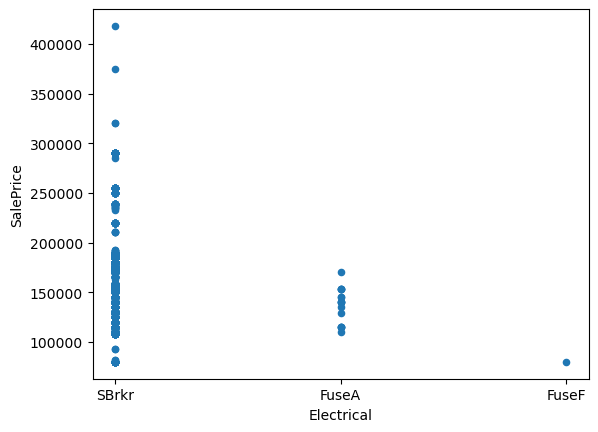

In [25]:
train_df.plot.scatter(x='Electrical',y='SalePrice')

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

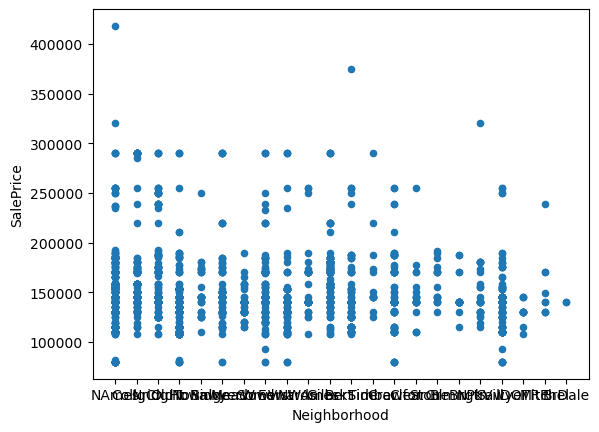

In [24]:
train_df.plot.scatter(x='Neighborhood',y='SalePrice')

## 特徴量の生成

In [63]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
sample_sub = pd.read_csv('../data/sample_submit.csv')

train_Id = train_df['index']
test_Id = test_df['index']

train_df.drop(columns=['index','Order'])
test_df.drop(columns=['index','Order'])

# set type label
train_df['type'] = 'train'
test_df['type'] = 'test'

combined_df = pd.concat((train_df, test_df))

,MS SubClass,MS Zoning,Lot Area,Lot Shape,Land Contour,Lot Config,Neighborhood,Bldg Type,House Style,Overall Qual,...,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,9000,Reg,Lvl,Inside,NAmes,1Fam,1Story,5,...,1.998003,381.014258,Y,0,0,7,2007,WD,Normal,158000
1,20,RL,9600,Reg,Lvl,Inside,CollgCr,1Fam,1Story,7,...,1.998003,384.114652,Y,0,0,11,2007,WD,Normal,145000
2,20,RL,9600,Reg,Lvl,Inside,NridgHt,1Fam,1Story,9,...,2.998015,625.140330,Y,0,0,5,2008,WD,Normal,125000
3,80,RL,9600,Reg,Lvl,Inside,OldTown,1Fam,SLvl,6,...,0.998002,193.156275,Y,0,0,7,2006,WD,Normal,135000
4,20,RL,9600,Reg,Lvl,Inside,NoRidge,1Fam,1Story,7,...,2.998012,617.903766,Y,0,0,7,2007,WD,Normal,175000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,120,RL,1680,Reg,Lvl,Inside,NridgHt,TwnhsE,1Story,5,...,1.998001,416.886419,Y,0,0,5,2009,WD,Normal,130000
2996,160,RL,2665,Reg,Lvl,Inside,MeadowV,1Fam,2Story,5,...,1.998004,371.721904,Y,0,0,5,2006,WD,Normal,140000
2997,20,RL,7200,Reg,Lvl,Inside,NAmes,1Fam,1Story,5,...,1.998003,379.306321,Y,0,0,7,2007,WD,Normal,158000
2998,60,FV,9000,Reg,Lvl,Inside,Somerst,1Fam,2Story,6,...,1.998002,371.138581,Y,0,0,7,2007,WD,Normal,158000


,MS SubClass,MS Zoning,Lot Area,Lot Shape,Land Contour,Lot Config,Neighborhood,Bldg Type,House Style,Overall Qual,...,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,60,RL,6120,IR1,Lvl,Inside,CollgCr,1Fam,2Story,8,...,1,2.998003,372.666174,Y,0,0,6,2006,WD,Normal
1,20,RL,9600,Reg,Lvl,Inside,Sawyer,1Fam,1Story,5,...,0,1.998014,637.974154,Y,0,0,3,2006,WD,Normal
2,20,RL,9600,IR1,Lvl,Inside,NridgHt,1Fam,1Story,9,...,1,2.998008,605.913790,Y,0,0,5,2007,WD,Normal
3,80,RL,9600,IR1,Lvl,Inside,NAmes,1Fam,SLvl,5,...,1,0.998020,200.755592,Y,0,0,7,2006,WD,Normal
4,20,RL,7200,Reg,Lvl,Inside,NAmes,1Fam,1Story,5,...,0,1.998003,377.495159,Y,0,0,7,2007,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,120,RL,3907,IR1,Lvl,Inside,StoneBr,1Fam,1Story,8,...,1,1.998003,641.261977,Y,0,0,6,2007,WD,Normal
1996,120,RL,3907,IR1,Lvl,Inside,Mitchel,1Fam,1Story,6,...,1,1.998007,387.032024,Y,0,0,7,2008,WD,Normal
1997,50,RL,6000,Reg,Lvl,Inside,Crawfor,1Fam,1.5Fin,4,...,0,1.998007,406.608942,Y,0,0,7,2009,WD,Normal
1998,120,RL,1680,Reg,Lvl,Inside,Edwards,1Fam,1Story,5,...,1,-0.001999,-0.001395,Y,0,0,6,2009,WD,Normal


## ラベルエンコーディング
参考：https://zenn.dev/yuto_mo/articles/131c49be5aee53　　、　https://www.salesanalytics.co.jp/datascience/datascience233/

In [64]:
# labelエンコーディングの適応（Lot ShapeとLand ContourはOrdinalエンコーディングかも）
cols = ('Lot Shape', 'Land Contour', 'Lot Config', 'Neighborhood', 'House Style', 'Roof Style', 'Central Air', 'Paved Drive', 'Sale Type', 'Sale Condition')
for c in cols:
    le = LabelEncoder()
    combined_df[c] = le.fit_transform(combined_df[c])

# Ordinalエンコーディング
exterior_order=['Ex', 'Gd', 'TA']
heating_QC_order=['Ex', 'Gd', 'TA']
kitchen_QC_order=['Ex', 'Gd', 'TA', 'Fa']
combined_df['Exter Qual'] = pd.Categorical(combined_df['Exter Qual'], categories=exterior_order, ordered=True).codes
combined_df['Heating QC'] = pd.Categorical(combined_df['Heating QC'], categories=heating_QC_order, ordered=True).codes
combined_df['Kitchen Qual'] = pd.Categorical(combined_df['Kitchen Qual'], categories=kitchen_QC_order, ordered=True).codes

# One-Hotエンコーディングの適用（ElectricalはOrdinalエンコーディングかも）
cols = ['MS Zoning', 'Bldg Type', 'Exterior 1st', 'Exterior 2nd', 'Foundation', 'Electrical']
combined_df = pd.get_dummies(combined_df, columns=cols)


### EDA

In [65]:
# trainとtestに分けなおす
train_df = combined_df[combined_df['type'] == 'train']
test_df = combined_df[combined_df['type'] == 'test'].drop(columns=['SalePrice'])

# 学習に不要な特徴量を削除
train_df = train_df.drop(columns=['type'])
test_df = test_df.drop(columns=['type'])

# 評価データ作成
X_train = train_df.drop("SalePrice", axis=1)
y_train = train_df["SalePrice"]
X_test  = test_df

print(X_train.shape, y_train.shape, X_test.shape)

(3000, 72) (3000,) (2000, 72)


#### LightGBM

In [66]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

lgb_params = {
    "objective":"regression",
    "metric": "rmse"
}

cv = KFold(n_splits=3, random_state=42, shuffle=True)
rmse_results = []
lgbm_models = []
# 検証データの予測値を保存するための配列。
test_preds = np.zeros(len(X_test))

for trn_index, val_index in cv.split(X_train, y_train):
    X_trn, X_val = X_train.loc[trn_index], X_train.loc[val_index]
    y_trn, y_val = y_train[trn_index], y_train[val_index]
    # 学習/評価データを格納
    train_lgb = lgb.Dataset(X_trn, y_trn)
    # 学習
    validation_lgb = lgb.Dataset(X_val, y_val)
    model = lgb.train(
        lgb_params, train_lgb, 
        num_boost_round=1000, valid_sets=[validation_lgb], 
        callbacks=[lgb.log_evaluation(period=10),lgb.early_stopping(100)]
        )
    # テストデータによる予測
    pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    print("RMSE:", rmse)
    rmse_results.append(rmse)
    lgbm_models.append(model)
    
    test_preds += model.predict(X_test) / cv.n_splits

print(rmse_results)
print("Average:", np.mean(rmse_results))

submission = pd.read_csv('../data/sample_submit.csv', header=None, names=['index', 'SalePrice'])
submission['SalePrice']  = test_preds
display(submission.head(10))
# 提出ファイルを出力
submission.to_csv("second_submit.csv", index=False, header = False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000550 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2207
[LightGBM] [Info] Number of data points in the train set: 2000, number of used features: 53
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 150495.585000
Training until validation scores don't improve for 100 rounds
[10]	valid_0's rmse: 27850.6
[20]	valid_0's rmse: 27948.8
[30]	valid_0's rmse: 28060.9
[40]	valid_0's rmse: 28078.5
[50]	valid_0's rmse: 28171.2
[60]	valid_0's rmse: 28232.9
[70]	valid_0's rmse: 28335.9
[80]	valid_0's rmse: 28380.9
[90]	valid_0's rmse: 28452.9
[100]	valid_0's rmse: 28575.5
[110]	valid_0's rmse: 28599.6
Early stopping, best iteration is:
[12]	valid_0's rmse: 27819.2
RMSE: 27819.225792412788
[LightGBM] [Warning] F

,index,SalePrice
0,398,151765.971143
1,3833,157955.989946
2,4836,150198.085780
3,4572,142525.791663
4,636,155863.399216
5,2545,157650.806100
6,1161,157375.758255
7,2230,156751.055087
8,148,151718.672242
9,2530,162378.362710


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

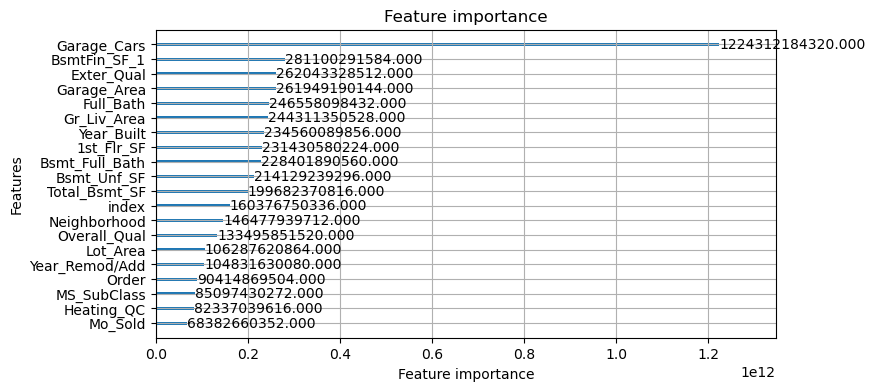

In [67]:
lgb.plot_importance(model, figsize=(8,4), max_num_features=20, importance_type='gain')

#### 参考サイト
https://qiita.com/ku_a_i/items/74241c84cda8c7327277